In [4]:
# !pip install openai

In [1]:
import pandas as pd
import openai
import numpy as np
from openai.embeddings_utils import get_embedding, cosine_similarity

In [2]:

openai.api_key = api_key

In [25]:
# corpus = ['A man is eating food.',
#           'A man is eating a piece of bread.',
#           'Horse is eating grass.',
#           'A man is eating pasta.',
#           'A Woman is eating Biryani.',
#           'The girl is carrying a baby.',
#           'The baby is carried by the woman',
#           'A man is riding a horse.',
#           'A man is riding a white horse on an enclosed ground.',
#           'A monkey is playing drums.',
#           'Someone in a gorilla costume is playing a set of drums.',
#           'A cheetah is running behind its prey.',
#           'A cheetah chases prey on across a field.',
#           'The cheetah is chasing a man who is riding the horse.',
#           'man and women with their baby are watching cheetah in zoo'
#           ]
     

In [47]:
trump_wiki = [
    'In 1977, Trump married Czech model Ivana Zelníčková',
    'They had three children: Donald Jr(born 1977), Ivanka (born 1981), and Eric (born 1984)',
    'Ivana became a naturalized United States citizen in 1988',
    "The couple divorced in 1990, following Trump's affair with actress Marla Maples",
    'Trump and Maples married in 1993 and divorced in 1999',
    'They have one daughter, Tiffany (born 1993), who was raised by Marla in California',
    'In 2005, Trump married Slovenian model Melania Knauss',
    "Starting in 1968, Trump was employed at his father's real estate company, Trump Management, which owned racially segregated middle-class rental housing in New York City's outer boroughs",
    "In 1971, he became president of the company and began using the Trump Organization as an umbrella brand."
"Trump's political party affiliation has changed numerous times",
    'He registered as a Republican in 1987; a member of the Independence Party, the New York state affiliate of the Reform Party, in 1999; a Democrat in 2001; a Republican in 2009; unaffiliated in 2011; and a Republican in 2012.'
]


In [9]:
musk_wiki = [
    "Musk was often bullied.",
    "In one incident, after calling a boy whose father had committed suicide 'stupid,' Musk was severely beaten and thrown down concrete steps.",
    "He was also an enthusiastic reader of books, attributing his success in part to having read Benjamin Franklin: An American Life, Lord of the Flies, the Foundation series, and The Hitchhiker's Guide to the Galaxy.",
    "At age ten, he developed an interest in computing and video games, teaching himself how to program from the VIC-20 user manual.",
    "At age twelve, Musk sold his BASIC-based game Blastar to PC and Office Technology magazine for approximately $500.",
    "Later in 1999, Musk co-founded X.com, an online financial services and e-mail payment company with money he made from the Compaq acquisition.",
    "X.com was one of the first federally insured online banks, and over customers joined in its initial months of operation.",
    "Even though Musk founded the company, investors regarded him as inexperienced and replaced him with Intuit CEO Bill Harris by the end of the year.",
    "In 2000, X.com merged with online bank Confinity to avoid competition, as the latter's money-transfer service PayPal was more popular than X.com's service.",
    "Musk then returned as CEO of the merged company. His preference for Microsoft over Unix-based software caused a rift among the company's employees, and eventually led Confinity co-founder Peter Thiel to resign.",
    "With the company suffering from compounding technological issues and the lack of a cohesive business model, the board ousted Musk and replaced him with Thiel in September 2000.",
    "Under Thiel, the company focused on the money-transfer service and was renamed PayPal in 2001.",
    "Tesla, Inc., originally Tesla Motors, was incorporated in July 2003 by Martin Eberhard and Marc Tarpenning, who financed the company until the Series A round of funding.",
    "Both men played active roles in the company's early development prior to Musk's involvement.",
    "Musk led the Series A round of investment in February 2004; he invested $6.5 million, became the majority shareholder, and joined Tesla's board of directors as chairman.",
    "Musk took an active role within the company and oversaw Roadster product design but was not deeply involved in day-to-day business operations.",
    "In 2008, Musk began dating English actress Talulah Riley. They married two years later at Dornoch Cathedral in Scotland.",
    "In 2012, the couple divorced, before remarrying the following year.",
    "After briefly filing for divorce in 2014, Musk finalized a second divorce from Riley in 2016.",
    "Musk then dated Amber Heard for several months in 2017; he had reportedly been pursuing her since 2012."
]


In [31]:
largarde_wiki = [
    '[0] is our person to focus on',
 ' [0] (French: [kʁistin madlɛn ɔdɛt laɡaʁd]; née Lallouette, IPA: [lalwɛt]; born 1 January 1956) is a French politician and lawyer who has served as President of the European Central Bank since 2019',
 ' [0] previously served as the 11th Managing Director of the International Monetary Fund (IMF) from 2011 to 2019',
 ' [0] had also served in the Government of France, most prominently as Minister of the Economy, Finance and Industry from 2007 until 2011',
 ' [0] is the first woman to hold each of those posts',
 "Born and raised in Paris, [0] graduated from law school at Paris Nanterre University and obtained a Master's degree from Sciences Po Aix",
 ' After being admitted to the Paris Bar, [0] joined the international law firm Baker & McKenzie as an associate in 1981, specializing in labor and anti-trust, as well as mergers and acquisitions',
 " Rising through the ranks, [0] was a member of the executive committee of the international law firm Baker & McKenzie from 1995 until 1999, before being elevated to the international law firm Baker & McKenzie's Chair between 1999 and 2004; [0] was the first woman in both positions",
 ' [0] held the top post until [0] decided to go into public service',
 '[0] returned to France when appointed Minister of Foreign Trade from 2005 to 2007, then briefly served as Minister of Agriculture and Fisheries from May to June 2007, and finally, as Minister of Finance from 2007 to 2011, making [0] the first female to hold the finance portfolio of any Group of Eight economy',
 " During [0]'s tenure, [0] oversaw the government response to the late 2000s financial crisis, for which the Financial Times ranked [0] the best finance minister in the Eurozone",
 'On 5 July 2011, [0] was elected to replace Dominique Strauss-Kahn as managing director of the International Monetary Fund (IMF) for a five-year term',
 " [0]'s was the 11th consecutive appointment of a European to head the International Monetary Fund (IMF)",
 ' [0] was selected by consensus for a second five-year term, starting 5 July 2016, being the only candidate nominated for the top post',
 " In December 2016, a French court convicted [0] of negligence relating to [0]'s role in the Bernard Tapie arbitration, but did not impose a penalty",
 " [0] resigned from the International Monetary Fund (IMF) following [0]'s nomination as president of the ECB",
 "In 2019 and again in 2020, Forbes ranked [0]'s number two on Forbes's World's 100 Most Powerful Women list",
 '[0] is our person to focus on',
 ' [0] was born in Paris, France, into a family of teachers',
 '  Her Father, Robert Lallouette, "was born to a Jewish mother and a non-religious father',
 '", was an English teacher; [0]\'s mother, Nicole (Carré), was a Latin, Greek and French literature teacher',
 " Lagarde and her three younger brothers spent Lagarde and her three younger brothers's childhood in Le Havre",
 ' There [0] attended the Lycée François 1er (where Her Father, Robert Lallouette, taught) and Lycée Claude Monet',
 'As a teenager, [0] was a member of the French national synchronised swimming team',
 " After [0]'s baccalauréat in 1973, [0] went on an American Field Service scholarship to the Holton-Arms School in Bethesda, Maryland",
 " During [0]'s year in the United States, [0] worked as an intern at the U",
 'S',
 " Capitol as Representative William Cohen's's congressional assistant, helping Representative William Cohen's correspond with French-speaking constituents from Representative William Cohen's's northern Maine district during the Watergate hearings",
 " [0] graduated from Paris Nanterre University, where [0] obtained master's degrees in English, labour law, and social law",
 " [0] also holds a master's degree from the Institut d'études politiques in Aix-en-Provence",
 " Since 2010, [0] has presided over the Institut d'études politiques in Aix-en-Provence's board of directors",
 '[0] is our person to focus on',
 ' [0] joined Baker & McKenzie, a large Chicago-based international law firm, in 1981',
 ' [0] handled major antitrust and labour cases, was made partner after six years and was named head of Baker & McKenzie, a large Chicago-based international law firm, in Western Europe',
 " [0] joined the executive committee in 1995 and was elected Baker & McKenzie, a large Chicago-based international law firm,'s first female chairman in October 1999",
 ' Three years later [0] was reelected',
 ' At Baker & McKenzie, a large Chicago-based international law firm, [0] promulgated a “client first” approach whereby lawyers anticipated client needs rather than solely reacting to exigent situations',
 'In 2004, [0] became president of the Global Strategic Committee',
 '[0] is our person to focus on',
 " As France's's trade minister between 2005 and May 2007, [0] prioritized opening new markets for France's's products, focusing on the technology sector",
 ' On 18 May 2007, [0] was moved to the Ministry of Agriculture as part of the government of François Fillon',
 " The following month [0] joined François Fillon's cabinet in the Ministry of Economic Affairs, Finance and Employment",
 " [0] was the only member of the French political class to condemn Jean-Paul Guerlain's racist remarks of 2010",
 ' In government, [0] implemented liberal economic reforms, such as liberalizing the labor market, lowering estate taxes, and an austerity plan for public services',
 '[0] is our person to focus on',
 ' On 25 May 2011, [0] announced her candidacy to be head of the IMF to succeed Dominique Strauss-Kahn, upon his resignation',
 ' her candidacy to be head of the IMF to succeed Dominique Strauss-Kahn, upon his resignation received the support of the British, Indian, United States, Brazilian, Russian, Chinese and German governments',
 ' The governor of the Bank of Mexico (and former Secretary of Finance) Agustín Carstens was also nominated for head of the IMF',
 " The governor of the Bank of Mexico (and former Secretary of Finance) Agustín Carstens's candidacy was supported by many Latin American governments, as well as Spain, Canada and Australia",
 "On 28 June 2011, the IMF board elected [0] as the IMF's next managing director and chairman for a five-year term, starting on 5 July 2011",
 ' the IMF board praised both [0] and The governor of the Bank of Mexico (and former Secretary of Finance) Agustín Carstens as well-qualified, but decided on [0] by consensus',
 ' [0] became the first woman to be elected as head of the IMF',
 ' The governor of the Bank of Mexico (and former Secretary of Finance) Agustín Carstens would have been the first non-European',
 " [0]'s came amid the intensification of the European sovereign debt crisis especially in Greece, with fears looming of loan defaults",
 " United States in particular supported [0]'s in light of the fragility of Europe's's economic situation",
 'U',
 'S',
 ' Treasury Secretary Timothy Geithner said that [0]\'s "exceptional talent and broad experience will provide invaluable leadership for the IMF at a critical time for the global economy',
 '" President Nicolas Sarkozy referred to [0]\'s as "a victory for France',
 '" Oxfam, a charity working in developing nations, called the appointment process "farcical" and argued that what Oxfam, a charity working in developing nations, saw as a lack of transparency hurt the IMF\'s credibility',
 'On 17 December 2015, Michel Sapin, French Finance Minister, said that [0] could stay on as head of the IMF, despite being charged with criminal negligence',
 " Throughout [0]'s time at the IMF, [0] repeatedly ruled [0] out of the races to secure a top job in Europe's, including the positions of President of the European Commission and President of the European Central Bank",
 ' On 2 July 2019, [0] was nominated to serve as the next president of the European Central Bank, to succeed Mario Draghi',
 " [0] subsequently submitted [0]'s resignation as managing director",
 '[0] is our person to focus on',
 ' In July 2010, [0] told the PBS NewsHour that the IMF\'s\'s lending program for distressed European countries was "a very massive plan, totally unexpected, totally counter-treaty, because it wasn\'t scheduled in the treaty that the IMF\'s should do a bailout program, as the IMF\'s did',
 '" [0] also said, "the IMF\'s had essentially a trillion dollars on the table to confront any market attack that would target any country, whether it\'s Greece, Spain, Portugal, or anybody within the eurozoneany country, whether it\'s Greece, Spain, Portugal, or anybody within the eurozone',
 '" With respect to the French economy, [0] stated that besides short-term stimulus efforts: "the French economy must, very decisively, cut the French economy\'s deficit and reduce the French economy\'s debt',
 '"In public remarks made right after [0]\'s appointment, [0] stated that both the IMF\'s and EU required Greece austerity measures as a prerequisite for further aid',
 ' [0] said, "If [0] have one message tonight about Greece, one message tonight about Greece is to call on the Greek political opposition to support the party that is currently in power in a spirit of national unity',
 '" [0] said of [0]\'s predecessor that: "the IMF\'s has taken up the challenges of the crisis thanks to the actions of Managing Director Dominique Strauss-Kahn and to Managing Director Dominique Strauss-Kahn\'s team as well',
 '" On 25 December 2011, [0] argued that the world economy was at risk and urged Europeans to unify in terms of the debt crisis facing the continent',
 'In July 2012, as the Greece economy continued to decline, and Greece\'s leaders asked for an easing of the terms of external assistance, [0] said [0] was "not in the negotiation or renegotiation mood at all',
 '" A year later, though, with the IMF\'s conceding that the IMF\'s\'s "rescue" package for Greece had fallen short of what was required, [0]—having previously said that Greece\'s debt burden was "sustainable"—decided that Greece would not recover unless Greece\'s debt was written off in a meaningful way',
 ' According to Yanis Varoufakis, the combative former Finance Minister of Greece, [0] and others at the top of the IMF\'s were quite sympathetic behind closed doors, while stating that inside the Eurogroup there were "a few kind words and a few kind words was it"',
 " As the crisis peaked again in summer 2015, the IMF's made headlines by calling for massive debt relief for Greece, calling[0] ",
 " In 2016, the IMF's refused to participate with eurozone countries in further emergency financing for Greece, because concrete measures to relieve Greece of Greece's debt burden remained absent",
 'Questioned about [0]\'s economic philosophy, [0] has described [0] as "with Adam Smith—that is, liberal',
 '"In an interview in May 2012, [0] was asked about the Greek government-debt crisis',
 ' [0] mentioned Greek tax avoidance, and assented to the interviewer\'s suggestion that Greeks had "had a nice time" but now "it is payback time',
 '" [0]\'s comments provoked controversy, with future Greek Prime Minister Alexis Tsipras stating, "We don\'t need [0]\'s compassion," and then-Deputy Prime Minister Evangelos Venizelos saying [0] had "insulted Greeks',
 '" In an effort to quell the negative response, the next day [0] made a post to [0]\'s Facebook page saying: "As [0] have said many times before, [0] am very sympathetic to Greeks and the challenges Greeks are facing',
 '" Within 24 hours, over 10,000 comments had been left in response, many of over 10,000 comments obscene',
 'In response to [0]\'s belief that not enough Greeks paid not enough Greeks\'s taxes, Professor Emeritus John Weeks of the University of London said, "The moral weight of [0]\'s matronising of Greeks to pay Greeks\'s taxes is not strengthened by the fact that, as director of the IMF\'s, [0] is in receipt of a tax-free annual salary of $468,000 (£298,000, plus perks)',
 '" Robert W',
 ' Wood, in a Forbes article, wrote that "No taxes is the norm for most United Nations employees covered by a convention on diplomatic relations signed by most nations',
 '"In January 2015, on the death of King Abdullah of Saudi Arabia, [0] said "King Abdullah of Saudi Arabia was a strong believer in pushing forward women\'s rights", prompting a number of observers to comment on the life of women generally in Saudi Arabia',
 '[0] is our person to focus on',
 ' On 2 July 2019, [0] was nominated by the European Council to succeed Mario Draghi as President of the European Central Bank (ECB) on 1 November 2019',
 ' On 17 September 2019, the European Parliament voted via secret ballot to recommend [0] to President of the European Central Bank (ECB), with 394 in favor, 206 opposed, and 49 abstentions',
 'As President of the European Central Bank (ECB), [0] is expected to maintain the accommodative monetary policy of Mario Draghi',
 " When addressing the European Parliament's ECON Committee ahead of [0]'s appointment, [0] also expressed [0]'s willingness to make the European Central Bank (ECB) play a role in fighting climate change and to carry out a review of the European Central Bank (ECB)'s monetary policy framework",
 '[0] received the insignia of Commander of the National Order of Merit from Emmanuel Macron in February 2022',
 " According to the French press, Nicolas Sarkozy suggested to Emmanuel Macron that [0] becomes Emmanuel Macron's Prime Minister in case of re-election in the French presidential election of 2022",
 '[0] is our person to focus on',
 " In 2010 [0], sent a list of 1,991 names of Greek customers who were potential tax avoiders with bank accounts at HSBC's Geneva branch to the Greek government",
 "On 28 October 2012, Greek reporter and editor Kostas Vaxevanis claimed to be in possession of a list of 1,991 names of Greek customers who were potential tax avoiders with bank accounts at HSBC's Geneva branch and published a document with more than 2,000 names in Greek reporter and editor Kostas Vaxevanis's magazine Hot Doc",
 ' Greek reporter and editor Kostas Vaxevanis was immediately arrested on charges of breaching privacy laws with a possible sentence of up to two years in prison',
 ' After a public outcry, Greek reporter and editor Kostas Vaxevanis was found not guilty three days later',
 " Greek reporter and editor Kostas Vaxevanis then faced a retrial (the Greek authorities were yet to charge anyone on a list of 1,991 names of Greek customers who were potential tax avoiders with bank accounts at HSBC's Geneva branch), but was acquitted again",
 ' A few days before the Greek general elections of January 2015, when it was clear that left-wing Syriza would come to power, the financial crimes police of the conservative government of Antonis Samaras shredded reams of documents pertaining to corruption cases',
 '[0] is our person to focus on',
 " On 3 August 2011, La Cour de Justice de la République, a special court in France set up to judge ministers and public officials for alleged crimes committed while in office, ordered an investigation into Lagarde's role in a 2007 €403 million arbitration deal in favour of businessman Bernard Tapie when she was finance minister",
 " On 20 March 2013, [0]'s apartment in Paris was raided by French police as part of an investigation into Lagarde's role in a 2007 €403 million arbitration deal in favour of businessman Bernard Tapie when she was finance minister",
 ' On 24 May 2013, after two days of questioning at the Court of Justice of the Republic (CJR), [0] was assigned the status of "assisted witness", meaning that [0] was not under investigation in the affair',
 ' According to a press report from June 2013, [0] was described by Stéphane Richard, the CEO of France Telecom (a former aide to [0] when [0] was finance minister), who was himself put under formal investigation in the affair, as having been fully briefed before approving a 2007 €403 million arbitration deal in favour of businessman Bernard Tapie when she was finance minister',
 'In 2013, the press revealed an undated hand-written letter seized by investigators during a search of [0]\'s Paris home, in which [0] appears to express [0]\'s full allegiance to then-President Nicolas Sarkozy: "Use [0] for as long as it suits then-President Nicolas Sarkozy and suits then-President Nicolas Sarkozy\'s action and then-President Nicolas Sarkozy\'s casting',
 ' (',
 ') If then-President Nicolas Sarkozy use [0], [0] need then-President Nicolas Sarkozy as a guide and as a support: without a guide, [0] risk being ineffective, without a support [0] risk having little credibility',
 " With [0]'s immense admiration",
 ' Christine L',
 '"Subsequently, in August 2014 the Court of Justice of the Republic (CJR) announced that the Court of Justice of the Republic (CJR) had formally approved a negligence investigation into [0]\'s role in a 2007 €403 million arbitration deal in favour of businessman Bernard Tapie when she was finance minister',
 ' On 17 December 2015, the Court of Justice of the Republic (CJR) ordered [0] to stand trial before the Court of Justice of the Republic (CJR) for alleged negligence in handling the businessman Bernard Tapie arbitration approval',
 'In December 2016, the Court of Justice of the Republic (CJR) found [0] guilty of negligence, but declined to impose either a fine or custodial penalty',
 '[0] is our person to focus on',
 ' [0] was interviewed in the documentary film Inside Job (2010), which later won an Academy Award for Best Documentary Feature',
 'The American fashion magazine Vogue profiled [0] in September [0] was portrayed by Laila Robins in the HBO television film Too Big to Fail (2011), which was based on the popular non-fiction book of the same name by The New York Times journalist Andrew Ross Sorkin',
 'Meryl Streep based parts of Miranda Priestly\'s appearance in the feature film The Devil Wears Prada (2006) on [0], citing [0] "unassailable elegance and authority"',
 '[0] presented the 2014 Richard Dimbleby Lecture, titled "A New Multilateralism for the 21st Century"',
 '[0] is our person to focus on',
 ' [0] has been in three long-term relationships, one of which has been confirmed to have resulted in a marriage, while sources differ on whether the other two relationships resulted in a marriage',
 ' [0] married her first partner, French financial analyst Wilfried Lagarde, in 1982 and divorced her first partner, French financial analyst Wilfried Lagarde, in 1992',
 ' The couple have two sons, Pierre-Henri Lagarde (born 1986) and Thomas Lagarde (born 1988)',
 " [0]'s second relationship was with the British businessman Eachran Gilmour",
 ' Sources differ on whether [0] ever married the British businessman Eachran Gilmour',
 ' Since 2006, [0] has been in a relationship with French entrepreneur Xavier Giocanti, a fellow-student at Université Paris X',
 ' Some sources have described a relationship with French entrepreneur Xavier Giocanti, a fellow-student at Université Paris X',
 ' as married, but no marriage date has ever been publicized',
 "[0] is a health-conscious vegetarian, and [0]'s hobbies include regular trips to the gym, cycling, and swimming",
 '[0] speaks French, English and Spanish',
 ' After [0] took office as President of the European Central Bank, it was reported that [0] intends to learn German']

In [56]:
beckham_wiki=['David Beckham held the England appearance record for an outfield player until 2016.A global ambassador of football, David Beckham is considered to be a British cultural icon.',
 'David Beckham was inducted into the English Football Hall of Fame in 2008, and the Premier League Hall of Fame in 2021.',
 'David Beckham was born on 2 May 1975 at Whipps Cross University Hospital in Leytonstone, London, England.',
 'David Beckham is the son of Sandra Georgina (née West; b. 1949), a hairdresser, and David Edward Alan "Ted" Beckham (b. Edmonton, London, 1948), a kitchen fitter; the couple married in 1969 in the London Borough of Hackney.',
 'David Beckham was a their team mascot for a match against West Ham United in 1986.',
 "During a two-year period in which David Beckham played for Brimsdown Rovers' youth team, David Beckham was named Under-15 Player of the Year in 1990.",
 "David Beckham scored Manchester United's second goal in the 30th minute of Manchester United's 3–1 first-leg win of the final against Crystal Palace on 14 April 1992.",
 "On 7 December 1994, David Beckham made David Beckham's UEFA Champions League debut, scoring a goal in a 4–0 victory at home to Galatasaray in the final game of the group stage.",
 'At the beginning of the 1994–95 season, David Beckham was given the number 10 shirt that had most recently been worn by Mark Hughes.',
 'On 17 August 1996 (the first day of the Premier League season), David Beckham became something of a household name when David Beckham scored a spectacular goal in a match against Wimbledon.',
 "Despite David Beckham's achievements in the 1994–95 season, David Beckham was still unpopular among some opposition fans and journalists, and David Beckham was criticised after being sent off for a deliberate foul in Manchester United's World Club Championship match against Necaxa.",
 'David Beckham helped Manchester United retain the Premier League title in the 1999–2000 season by an 18-point margin, after being pushed by Arsenal and Leeds United for much of the season.',
 "In 2000, David Beckham was given permission to miss training to look after his son Brooklyn, who had gastroenteritis, but Alex Ferguson's was furious when Victoria Beckham was photographed at a London Fashion Week event on the same night, claiming that David Beckham would have been able to train if Victoria Beckham had looked after his son Brooklyn, who had gastroenteritis that day.",
 'David Beckham scored nine Premier League goals, and had the most assists in Premier League with 12.On 10 April 2002',
 'The way David Beckham runs for everything, the way David Beckham tries David Beckham\'s best. David Beckham has everyone\'s respect."—Ronaldo speaking about David Beckham in October 2003.In late-August 2003',
 'In July 2003, while David Beckham was in pre-season training in Spain, an intruder scaled a wall at the Beckham home while carrying a can of petrol.',
 'On 3 December 2005, David Beckham was sent off for the third time that season in a league match against Getafe.',
 "an empty-net goal marked the second time in David Beckham's career that David Beckham had scored from David Beckham's own half, the other being a 1996-goal from the half-way line against Wimbledon at Selhurst Park.",
 "In 2008, David Beckham's success in the England national team under Fabio Capello led to speculation that David Beckham might return to Europe to retain match fitness for the World Cup qualifying matches in 2009.",
 "rumours were confirmed on 4 February, when David Beckham stated that David Beckham was seeking a permanent transfer to AC Milan, in a bid to sustain David Beckham's the States career through the 2010 World Cup.",
 'David Beckham played 76\xa0minutes of the match at the San Siro – which ended 3–2 to Manchester United – before being substituted for Clarence Seedorf.David Beckham returned to Old Trafford for the second leg of the tie on 10 March 2010; David Beckham did not start the second leg of the tie on 10 March 2010, but was brought on for Ignazio Abate in the 64th minute to a positive reception from the home fans.',
 'the second leg of the tie on 10 March 2010 was the first time David Beckham had played against D.C. United at Old Trafford, and saw David Beckham create several scoring opportunities via crosses and corner kicks, but D.C. United dominated AC Milan and beat AC Milan 4–0, winning the tie 7–2.',
 'David Beckham was heavily linked with Paris Saint-Germain, but on 18 January 2012, MLS side LA Galaxy announced David Beckham had signed a new two-year contract to remain in Los Angeles.',
 "David Beckham's Paris Saint-Germain debut came on 24 February 2013, when David Beckham came off the bench in the 76th minute in a Ligue 1 home match against Marseille.",
 "Following David Beckham's decision to retire at the end of the 2012–13 season, David Beckham was given specially designed boots in the colours of the Union Jack to wear in his final game.",
 'On 18 May 2013, David Beckham was made captain in his final home game against Brest.',
 "David Beckham made David Beckham's first appearance for England on 1 September 1996, in a FIFA World Cup qualifying match against Moldova.",
 "David Beckham played in all of England's's qualifying matches for the 1998 FIFA World Cup and was part of the 23-man squad for the 1998 FIFA World Cup, but England's's manager Glenn Hoddle publicly accused David Beckham of not concentrating on the 1998 FIFA World Cup, and David Beckham did not start in either of England's's first two games.",
 "Many supporters and journalists blamed David Beckham for England's's and David Beckham became the target of criticism and abuse, including the hanging of an effigy outside a London pub, and the Daily Mirror printing a dartboard with a picture of David Beckham centred on the bullseye. David Beckham also received death threats after the 1998 FIFA World Cup.",
 "The abuse that David Beckham was receiving from English supporters peaked during England's's 3–2 defeat by Portugal in Euro 2000, a match where Beckham set up two goals, when a group of England's supporters taunted David Beckham throughout Euro 2000, a match where Beckham set up two goals.",
 'Give David Beckham a Knighthood!"—Television commentary on David Beckham\'s stoppage time 30-yard curling free-kick against Greece in the 2002 World Cup qualifying game in October 2001.On 15 November 2000, following Kevin Keegan\'s resignation as England\'s manager in October, David Beckham was promoted to team captain by the caretaker manager Peter Taylor, and then kept team captain under new manager Sven-Göran Eriksson.David Beckham played a major role in helping England\'s qualify for 2002 World Cup, starring in an impressive 5–1 victory over Germany in Munich.',
 'David Beckham was voted the BBC Sports Personality of the Year for 2001, and finished runner-up to Luís Figo of Portugal, for the FIFA World Player of the Year award.',
 'David Beckham was partially fit by the time of the 2002 World Cup held in Japan and South Korea, and played in the first match against Sweden.',
 "In October 2005, David Beckham's sending off against Austria made David Beckham the first England captain to be sent off and the first player to be sent off twice while playing for England. David Beckham captained England for the 50th time in a friendly international against Argentina the following month.",
 'Having stepped down as captain after the 2006 World Cup, David Beckham was dropped completely from the England national team selected by new coach Steve McClaren on 11 August 2006.',
 "On 26 May 2007, McClaren announced that David Beckham would be recalled to the England squad for the first time since stepping down as the England squad's captain.",
 'On 20 March 2008, David Beckham was recalled to the England squad by Capello for the friendly against France in Paris on 26 March.',
 "In all, David Beckham had made 16 appearances out of a possible 20 for England under Capello until David Beckham's ruptured Achilles tendon of March 2010 ruled David Beckham out of selection for the 2010 FIFA World Cup in South Africa.",
 'David Beckham was named in the provisional squad to represent the Great Britain Olympic football team at the 2012 Olympics.',
 "In January 2019 it was announced that David Beckham was set to join David Beckham's Class of '92 teammates as part owner of English non-league club Salford City, taking 10% of English non-league club Salford City previously held by Peter Lim, with taking being subject to Football Association approval.",
 'On 9 May 2019, at Bromley Magistrates Court, David Beckham was banned from driving for six months.',
 "As of 2021[update], David Beckham has more than 65 tattoos covering a large part of David Beckham's body, including tattoos on David Beckham's hands, neck and head.",
 "In David Beckham's autobiography David Beckham: My Side, David Beckham said that the idea of having tattoos came to David Beckham in 1999 after David Beckham's was born, following a conversation on the subject of tattoos with Mel B and Mel B's then-husband, Jimmy Gulzar.",
 "In January 2014, David Beckham appeared on Late Night with Jimmy Fallon on NBC in the United States, and in March David Beckham made a guest appearance in NBC TV's Sport Relief special of Only Fools and Horses. David Beckham was named one of GQ's 50 best dressed British men in 2015.In March 2015 David Beckham had the third highest social media rank in the world among sportspeople, behind Cristiano Ronaldo and Lionel Messi, with over 52 million Facebook fans.",
 'During the 2016 EU referendum, David Beckham voiced David Beckham\'s opposition to Brexit (UK leaving the European Union) stating: "For our children and our children\'s children our should be facing the problems of the world together and not alone.',
 'David Beckham was announced as the new Ambassadorial president of the British Fashion Council on 11 May 2018.',
 "In 2013, David Beckham also donated all David Beckham's £3.4 million salary taken from Paris Saint-Germain to two children's charities in France."]

In [102]:
beckham_wiki2=[
'summary: David Beckham held the England appearance record for an outfield player until 2016.A global ambassador of football, David Beckham is considered to be a British cultural icon.',
 'summary: David Beckham was inducted into the English Football Hall of Fame in 2008, and the Premier League Hall of Fame in 2021.',
 'Early life: David Beckham was born on 2 May 1975 at Whipps Cross University Hospital in Leytonstone, London, England.',
 'Early life: David Beckham is the son of Sandra Georgina (née West; b. 1949), a hairdresser, and David Edward Alan "Ted" Beckham (b. Edmonton, London, 1948), a kitchen fitter; the couple married in 1969 in the London Borough of Hackney.',
 'Early life: David Beckham was a their team mascot for a match against West Ham United in 1986.',
 "Early life: During a two-year period in which David Beckham played for Brimsdown Rovers' youth team, David Beckham was named Under-15 Player of the Year in 1990.",
 "Club career: David Beckham scored Manchester United's second goal in the 30th minute of Manchester United's 3–1 first-leg win of the final against Crystal Palace on 14 April 1992.",
 "Club career: On 7 December 1994, David Beckham made David Beckham's UEFA Champions League debut, scoring a goal in a 4–0 victory at home to Galatasaray in the final game of the group stage.",
 'Club career: At the beginning of the 1994–95 season, David Beckham was given the number 10 shirt that had most recently been worn by Mark Hughes.',
 'Club career: On 17 August 1996 (the first day of the Premier League season), David Beckham became something of a household name when David Beckham scored a spectacular goal in a match against Wimbledon.',
 "Club career: Despite David Beckham's achievements in the 1994–95 season, David Beckham was still unpopular among some opposition fans and journalists, and David Beckham was criticised after being sent off for a deliberate foul in Manchester United's World Club Championship match against Necaxa.",
 'Club career: David Beckham helped Manchester United retain the Premier League title in the 1999–2000 season by an 18-point margin, after being pushed by Arsenal and Leeds United for much of the season.',
 "Club career: In 2000, David Beckham was given permission to miss training to look after his son Brooklyn, who had gastroenteritis, but Alex Ferguson's was furious when Victoria Beckham was photographed at a London Fashion Week event on the same night, claiming that David Beckham would have been able to train if Victoria Beckham had looked after his son Brooklyn, who had gastroenteritis that day.",
 'Club career: David Beckham scored nine Premier League goals, and had the most assists in Premier League with 12.On 10 April 2002',
 'Club career: The way David Beckham runs for everything, the way David Beckham tries David Beckham\'s best. David Beckham has everyone\'s respect."—Ronaldo speaking about David Beckham in October 2003.In late-August 2003',
 'Club career: In July 2003, while David Beckham was in pre-season training in Spain, an intruder scaled a wall at the Beckham home while carrying a can of petrol.',
 'Club career: On 3 December 2005, David Beckham was sent off for the third time that season in a league match against Getafe.',
 "Club career: an empty-net goal marked the second time in David Beckham's career that David Beckham had scored from David Beckham's own half, the other being a 1996-goal from the half-way line against Wimbledon at Selhurst Park.",
 "Club career: In 2008, David Beckham's success in the England national team under Fabio Capello led to speculation that David Beckham might return to Europe to retain match fitness for the World Cup qualifying matches in 2009.",
 "Club career: rumours were confirmed on 4 February, when David Beckham stated that David Beckham was seeking a permanent transfer to AC Milan, in a bid to sustain David Beckham's the States career through the 2010 World Cup.",
 'Club career: David Beckham played 76\xa0minutes of the match at the San Siro – which ended 3–2 to Manchester United – before being substituted for Clarence Seedorf.David Beckham returned to Old Trafford for the second leg of the tie on 10 March 2010; David Beckham did not start the second leg of the tie on 10 March 2010, but was brought on for Ignazio Abate in the 64th minute to a positive reception from the home fans.',
 'Club career: the second leg of the tie on 10 March 2010 was the first time David Beckham had played against D.C. United at Old Trafford, and saw David Beckham create several scoring opportunities via crosses and corner kicks, but D.C. United dominated AC Milan and beat AC Milan 4–0, winning the tie 7–2.',
 'Club career: David Beckham was heavily linked with Paris Saint-Germain, but on 18 January 2012, MLS side LA Galaxy announced David Beckham had signed a new two-year contract to remain in Los Angeles.',
 "Club career: David Beckham's Paris Saint-Germain debut came on 24 February 2013, when David Beckham came off the bench in the 76th minute in a Ligue 1 home match against Marseille.",
 "Club career: Following David Beckham's decision to retire at the end of the 2012–13 season, David Beckham was given specially designed boots in the colours of the Union Jack to wear in his final game.",
 'Club career: On 18 May 2013, David Beckham was made captain in his final home game against Brest.',
 "International career: David Beckham made David Beckham's first appearance for England on 1 September 1996, in a FIFA World Cup qualifying match against Moldova.",
 "International career: David Beckham played in all of England's's qualifying matches for the 1998 FIFA World Cup and was part of the 23-man squad for the 1998 FIFA World Cup, but England's's manager Glenn Hoddle publicly accused David Beckham of not concentrating on the 1998 FIFA World Cup, and David Beckham did not start in either of England's's first two games.",
 "International career: Many supporters and journalists blamed David Beckham for England's's and David Beckham became the target of criticism and abuse, including the hanging of an effigy outside a London pub, and the Daily Mirror printing a dartboard with a picture of David Beckham centred on the bullseye. David Beckham also received death threats after the 1998 FIFA World Cup.",
 "International career: The abuse that David Beckham was receiving from English supporters peaked during England's's 3–2 defeat by Portugal in Euro 2000, a match where Beckham set up two goals, when a group of England's supporters taunted David Beckham throughout Euro 2000, a match where Beckham set up two goals.",
 'International career: Give David Beckham a Knighthood!"—Television commentary on David Beckham\'s stoppage time 30-yard curling free-kick against Greece in the 2002 World Cup qualifying game in October 2001.On 15 November 2000, following Kevin Keegan\'s resignation as England\'s manager in October, David Beckham was promoted to team captain by the caretaker manager Peter Taylor, and then kept team captain under new manager Sven-Göran Eriksson.David Beckham played a major role in helping England\'s qualify for 2002 World Cup, starring in an impressive 5–1 victory over Germany in Munich.',
 'International career: David Beckham was voted the BBC Sports Personality of the Year for 2001, and finished runner-up to Luís Figo of Portugal, for the FIFA World Player of the Year award.',
 'International career: David Beckham was partially fit by the time of the 2002 World Cup held in Japan and South Korea, and played in the first match against Sweden.',
 "International career: In October 2005, David Beckham's sending off against Austria made David Beckham the first England captain to be sent off and the first player to be sent off twice while playing for England. David Beckham captained England for the 50th time in a friendly international against Argentina the following month.",
 'International career: Having stepped down as captain after the 2006 World Cup, David Beckham was dropped completely from the England national team selected by new coach Steve McClaren on 11 August 2006.',
 "International career: On 26 May 2007, McClaren announced that David Beckham would be recalled to the England squad for the first time since stepping down as the England squad's captain.",
 'International career: On 20 March 2008, David Beckham was recalled to the England squad by Capello for the friendly against France in Paris on 26 March.',
 "International career: In all, David Beckham had made 16 appearances out of a possible 20 for England under Capello until David Beckham's ruptured Achilles tendon of March 2010 ruled David Beckham out of selection for the 2010 FIFA World Cup in South Africa.",
 'International career: David Beckham was named in the provisional squad to represent the Great Britain Olympic football team at the 2012 Olympics.',
 "Football-related business activities: In January 2019 it was announced that David Beckham was set to join David Beckham's Class of '92 teammates as part owner of English non-league club Salford City, taking 10% of English non-league club Salford City previously held by Peter Lim, with taking being subject to Football Association approval.",
 'Personal life: On 9 May 2019, at Bromley Magistrates Court, David Beckham was banned from driving for six months.',
 "Personal life: As of 2021[update], David Beckham has more than 65 tattoos covering a large part of David Beckham's body, including tattoos on David Beckham's hands, neck and head.",
 "Personal life: In David Beckham's autobiography David Beckham: My Side, David Beckham said that the idea of having tattoos came to David Beckham in 1999 after David Beckham's was born, following a conversation on the subject of tattoos with Mel B and Mel B's then-husband, Jimmy Gulzar.",
 "Celebrity status and commercial partnerships: In January 2014, David Beckham appeared on Late Night with Jimmy Fallon on NBC in the United States, and in March David Beckham made a guest appearance in NBC TV's Sport Relief special of Only Fools and Horses. David Beckham was named one of GQ's 50 best dressed British men in 2015.In March 2015 David Beckham had the third highest social media rank in the world among sportspeople, behind Cristiano Ronaldo and Lionel Messi, with over 52 million Facebook fans.",
 'Celebrity status and commercial partnerships: During the 2016 EU referendum, David Beckham voiced David Beckham\'s opposition to Brexit (UK leaving the European Union) stating: "For our children and our children\'s children our should be facing the problems of the world together and not alone.',
 'Celebrity status and commercial partnerships: David Beckham was announced as the new Ambassadorial president of the British Fashion Council on 11 May 2018.',
 "Philanthropy: In 2013, David Beckham also donated all David Beckham's £3.4 million salary taken from Paris Saint-Germain to two children's charities in France."]

In [103]:
response = openai.Embedding.create(
    input=beckham_wiki,
    model="text-embedding-ada-002"
)
     

In [22]:
# def get_embedding(text, model="text-embedding-ada-002"):
#    text = text.replace("\n", " ")
#    return openai.Embedding.create(input = [text], model=model)['data'][0]['embedding']

# # df['ada_embedding'] = df.combined.apply(lambda x: get_embedding(x, model='text-embedding-ada-002'))
# # df.to_csv('output/embedded_1k_reviews.csv', index=False)

In [23]:
# text = '''
# In 1977, Trump married Czech model Ivana Zelníčková.[15] They had three children: Donald Jr. (born 1977), Ivanka (born 1981), and Eric (born 1984). Ivana became a naturalized United States citizen in 1988.[16] The couple divorced in 1990, following Trump's affair with actress Marla Maples.[17] Trump and Maples married in 1993 and divorced in 1999. They have one daughter, Tiffany (born 1993), who was raised by Marla in California.[18] In 2005, Trump married Slovenian model Melania Knauss.[19] They have one son, Barron (born 2006).[20] Melania gained U.S. citizenship in 2006.[21]
# Trump's political party affiliation has changed numerous times. He registered as a Republican in 1987;[143] a member of the Independence Party, the New York state affiliate of the Reform Party, in 1999;[144] a Democrat in 2001; a Republican in 2009; unaffiliated in 2011; and a Republican in 2012.
# '''

In [5]:
from sklearn.cluster import KMeans

In [104]:
corpus_embeddings = [ d['embedding'] for d in response['data']]
# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

In [ ]:
clustering_model = KMeans(n_clusters=2)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_
print(cluster_assignment)

In [111]:
clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(beckham_wiki[sentence_id])
clustered_sentences

{0: ['David Beckham held the England appearance record for an outfield player until 2016.A global ambassador of football, David Beckham is considered to be a British cultural icon.',
  'David Beckham was inducted into the English Football Hall of Fame in 2008, and the Premier League Hall of Fame in 2021.',
  'David Beckham was born on 2 May 1975 at Whipps Cross University Hospital in Leytonstone, London, England.',
  'David Beckham is the son of Sandra Georgina (née West; b. 1949), a hairdresser, and David Edward Alan "Ted" Beckham (b. Edmonton, London, 1948), a kitchen fitter; the couple married in 1969 in the London Borough of Hackney.',
  'David Beckham was a their team mascot for a match against West Ham United in 1986.',
  "During a two-year period in which David Beckham played for Brimsdown Rovers' youth team, David Beckham was named Under-15 Player of the Year in 1990.",
  "In 2000, David Beckham was given permission to miss training to look after his son Brooklyn, who had gastr

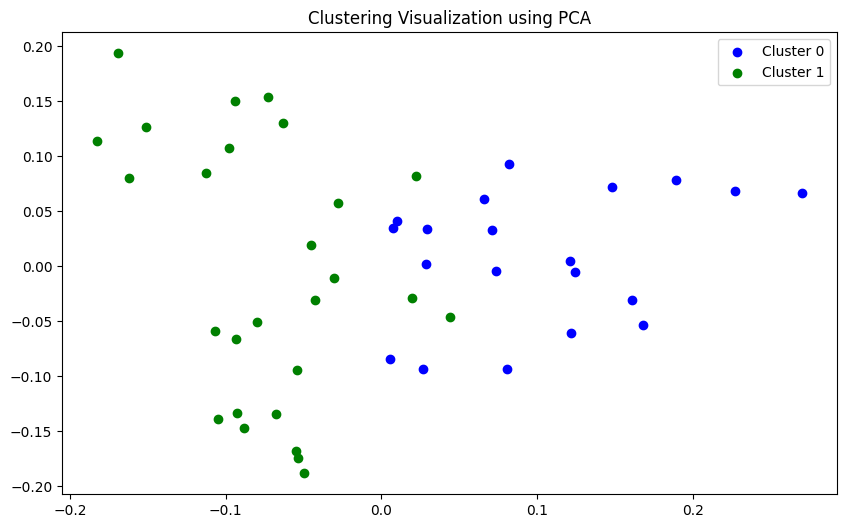

In [113]:
# import numpy as np
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # Assuming you have already computed 'corpus_embeddings' and 'cluster_assignment'
# # Perform PCA to reduce the dimensionality of embeddings to 2D
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(corpus_embeddings)

# # Create a scatter plot of the clustered sentences
# plt.figure(figsize=(10, 6))
# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# for cluster_id in range(max(cluster_assignment) + 1):
#     cluster_indices = np.where(cluster_assignment == cluster_id)[0]
#     plt.scatter(
#         pca_result[cluster_indices, 0],
#         pca_result[cluster_indices, 1],
#         label=f'Cluster {cluster_id}',
#         color=colors[cluster_id % len(colors)],
#     )

# plt.legend()
# plt.title('Clustering Visualization using PCA')
# plt.show()


In [61]:
beckham_cluster={1: ['David Beckham held the England appearance record for an outfield player until 2016.A global ambassador of football, David Beckham is considered to be a British cultural icon.',
  'David Beckham was inducted into the English Football Hall of Fame in 2008, and the Premier League Hall of Fame in 2021.',
  'David Beckham was born on 2 May 1975 at Whipps Cross University Hospital in Leytonstone, London, England.',
  'David Beckham is the son of Sandra Georgina (née West; b. 1949), a hairdresser, and David Edward Alan "Ted" Beckham (b. Edmonton, London, 1948), a kitchen fitter; the couple married in 1969 in the London Borough of Hackney.',
  'David Beckham was a their team mascot for a match against West Ham United in 1986.',
  "During a two-year period in which David Beckham played for Brimsdown Rovers' youth team, David Beckham was named Under-15 Player of the Year in 1990.",
  'At the beginning of the 1994–95 season, David Beckham was given the number 10 shirt that had most recently been worn by Mark Hughes.',
  "Despite David Beckham's achievements in the 1994–95 season, David Beckham was still unpopular among some opposition fans and journalists, and David Beckham was criticised after being sent off for a deliberate foul in Manchester United's World Club Championship match against Necaxa.",
  'David Beckham helped Manchester United retain the Premier League title in the 1999–2000 season by an 18-point margin, after being pushed by Arsenal and Leeds United for much of the season.',
  "In 2000, David Beckham was given permission to miss training to look after his son Brooklyn, who had gastroenteritis, but Alex Ferguson's was furious when Victoria Beckham was photographed at a London Fashion Week event on the same night, claiming that David Beckham would have been able to train if Victoria Beckham had looked after his son Brooklyn, who had gastroenteritis that day.",
  'David Beckham scored nine Premier League goals, and had the most assists in Premier League with 12.On 10 April 2002',
  'The way David Beckham runs for everything, the way David Beckham tries David Beckham\'s best. David Beckham has everyone\'s respect."—Ronaldo speaking about David Beckham in October 2003.In late-August 2003',
  'In July 2003, while David Beckham was in pre-season training in Spain, an intruder scaled a wall at the Beckham home while carrying a can of petrol.',
  'On 3 December 2005, David Beckham was sent off for the third time that season in a league match against Getafe.',
  'David Beckham was heavily linked with Paris Saint-Germain, but on 18 January 2012, MLS side LA Galaxy announced David Beckham had signed a new two-year contract to remain in Los Angeles.',
  "Many supporters and journalists blamed David Beckham for England's's and David Beckham became the target of criticism and abuse, including the hanging of an effigy outside a London pub, and the Daily Mirror printing a dartboard with a picture of David Beckham centred on the bullseye. David Beckham also received death threats after the 1998 FIFA World Cup.",
  'David Beckham was voted the BBC Sports Personality of the Year for 2001, and finished runner-up to Luís Figo of Portugal, for the FIFA World Player of the Year award.',
  'David Beckham was named in the provisional squad to represent the Great Britain Olympic football team at the 2012 Olympics.',
  "In January 2019 it was announced that David Beckham was set to join David Beckham's Class of '92 teammates as part owner of English non-league club Salford City, taking 10% of English non-league club Salford City previously held by Peter Lim, with taking being subject to Football Association approval.",
  'On 9 May 2019, at Bromley Magistrates Court, David Beckham was banned from driving for six months.',
  "As of 2021[update], David Beckham has more than 65 tattoos covering a large part of David Beckham's body, including tattoos on David Beckham's hands, neck and head.",
  "In David Beckham's autobiography David Beckham: My Side, David Beckham said that the idea of having tattoos came to David Beckham in 1999 after David Beckham's was born, following a conversation on the subject of tattoos with Mel B and Mel B's then-husband, Jimmy Gulzar.",
  "In January 2014, David Beckham appeared on Late Night with Jimmy Fallon on NBC in the United States, and in March David Beckham made a guest appearance in NBC TV's Sport Relief special of Only Fools and Horses. David Beckham was named one of GQ's 50 best dressed British men in 2015.In March 2015 David Beckham had the third highest social media rank in the world among sportspeople, behind Cristiano Ronaldo and Lionel Messi, with over 52 million Facebook fans.",
  'During the 2016 EU referendum, David Beckham voiced David Beckham\'s opposition to Brexit (UK leaving the European Union) stating: "For our children and our children\'s children our should be facing the problems of the world together and not alone.',
  'David Beckham was announced as the new Ambassadorial president of the British Fashion Council on 11 May 2018.',
  "In 2013, David Beckham also donated all David Beckham's £3.4 million salary taken from Paris Saint-Germain to two children's charities in France."],
 0: ["David Beckham scored Manchester United's second goal in the 30th minute of Manchester United's 3–1 first-leg win of the final against Crystal Palace on 14 April 1992.",
  "On 7 December 1994, David Beckham made David Beckham's UEFA Champions League debut, scoring a goal in a 4–0 victory at home to Galatasaray in the final game of the group stage.",
  'On 17 August 1996 (the first day of the Premier League season), David Beckham became something of a household name when David Beckham scored a spectacular goal in a match against Wimbledon.',
  "an empty-net goal marked the second time in David Beckham's career that David Beckham had scored from David Beckham's own half, the other being a 1996-goal from the half-way line against Wimbledon at Selhurst Park.",
  "In 2008, David Beckham's success in the England national team under Fabio Capello led to speculation that David Beckham might return to Europe to retain match fitness for the World Cup qualifying matches in 2009.",
  "rumours were confirmed on 4 February, when David Beckham stated that David Beckham was seeking a permanent transfer to AC Milan, in a bid to sustain David Beckham's the States career through the 2010 World Cup.",
  'David Beckham played 76\xa0minutes of the match at the San Siro – which ended 3–2 to Manchester United – before being substituted for Clarence Seedorf.David Beckham returned to Old Trafford for the second leg of the tie on 10 March 2010; David Beckham did not start the second leg of the tie on 10 March 2010, but was brought on for Ignazio Abate in the 64th minute to a positive reception from the home fans.',
  'the second leg of the tie on 10 March 2010 was the first time David Beckham had played against D.C. United at Old Trafford, and saw David Beckham create several scoring opportunities via crosses and corner kicks, but D.C. United dominated AC Milan and beat AC Milan 4–0, winning the tie 7–2.',
  "David Beckham's Paris Saint-Germain debut came on 24 February 2013, when David Beckham came off the bench in the 76th minute in a Ligue 1 home match against Marseille.",
  "Following David Beckham's decision to retire at the end of the 2012–13 season, David Beckham was given specially designed boots in the colours of the Union Jack to wear in his final game.",
  'On 18 May 2013, David Beckham was made captain in his final home game against Brest.',
  "David Beckham made David Beckham's first appearance for England on 1 September 1996, in a FIFA World Cup qualifying match against Moldova.",
  "David Beckham played in all of England's's qualifying matches for the 1998 FIFA World Cup and was part of the 23-man squad for the 1998 FIFA World Cup, but England's's manager Glenn Hoddle publicly accused David Beckham of not concentrating on the 1998 FIFA World Cup, and David Beckham did not start in either of England's's first two games.",
  "The abuse that David Beckham was receiving from English supporters peaked during England's's 3–2 defeat by Portugal in Euro 2000, a match where Beckham set up two goals, when a group of England's supporters taunted David Beckham throughout Euro 2000, a match where Beckham set up two goals.",
  'Give David Beckham a Knighthood!"—Television commentary on David Beckham\'s stoppage time 30-yard curling free-kick against Greece in the 2002 World Cup qualifying game in October 2001.On 15 November 2000, following Kevin Keegan\'s resignation as England\'s manager in October, David Beckham was promoted to team captain by the caretaker manager Peter Taylor, and then kept team captain under new manager Sven-Göran Eriksson.David Beckham played a major role in helping England\'s qualify for 2002 World Cup, starring in an impressive 5–1 victory over Germany in Munich.',
  'David Beckham was partially fit by the time of the 2002 World Cup held in Japan and South Korea, and played in the first match against Sweden.',
  "In October 2005, David Beckham's sending off against Austria made David Beckham the first England captain to be sent off and the first player to be sent off twice while playing for England. David Beckham captained England for the 50th time in a friendly international against Argentina the following month.",
  'Having stepped down as captain after the 2006 World Cup, David Beckham was dropped completely from the England national team selected by new coach Steve McClaren on 11 August 2006.',
  "On 26 May 2007, McClaren announced that David Beckham would be recalled to the England squad for the first time since stepping down as the England squad's captain.",
  'On 20 March 2008, David Beckham was recalled to the England squad by Capello for the friendly against France in Paris on 26 March.',
  "In all, David Beckham had made 16 appearances out of a possible 20 for England under Capello until David Beckham's ruptured Achilles tendon of March 2010 ruled David Beckham out of selection for the 2010 FIFA World Cup in South Africa."]}

In [62]:
beckham_cluster3={
    '1': ['summary: David Beckham held the England appearance record for an outfield player until 2016.A global ambassador of football, David Beckham is considered to be a British cultural icon.',
  'summary: David Beckham was inducted into the English Football Hall of Fame in 2008, and the Premier League Hall of Fame in 2021.',
  'Early life: David Beckham was born on 2 May 1975 at Whipps Cross University Hospital in Leytonstone, London, England.',
  'Early life: David Beckham is the son of Sandra Georgina (née West; b. 1949), a hairdresser, and David Edward Alan "Ted" Beckham (b. Edmonton, London, 1948), a kitchen fitter; the couple married in 1969 in the London Borough of Hackney.',
  'Early life: David Beckham was a their team mascot for a match against West Ham United in 1986.',
  "Early life: During a two-year period in which David Beckham played for Brimsdown Rovers' youth team, David Beckham was named Under-15 Player of the Year in 1990.",
  'Club career: At the beginning of the 1994–95 season, David Beckham was given the number 10 shirt that had most recently been worn by Mark Hughes.',
  "Club career: Despite David Beckham's achievements in the 1994–95 season, David Beckham was still unpopular among some opposition fans and journalists, and David Beckham was criticised after being sent off for a deliberate foul in Manchester United's World Club Championship match against Necaxa.",
  'Club career: David Beckham helped Manchester United retain the Premier League title in the 1999–2000 season by an 18-point margin, after being pushed by Arsenal and Leeds United for much of the season.',
  "Club career: In 2000, David Beckham was given permission to miss training to look after his son Brooklyn, who had gastroenteritis, but Alex Ferguson's was furious when Victoria Beckham was photographed at a London Fashion Week event on the same night, claiming that David Beckham would have been able to train if Victoria Beckham had looked after his son Brooklyn, who had gastroenteritis that day.",
  'Club career: David Beckham scored nine Premier League goals, and had the most assists in Premier League with 12.On 10 April 2002',
  'Club career: The way David Beckham runs for everything, the way David Beckham tries David Beckham\'s best. David Beckham has everyone\'s respect."—Ronaldo speaking about David Beckham in October 2003.In late-August 2003',
  'Club career: In July 2003, while David Beckham was in pre-season training in Spain, an intruder scaled a wall at the Beckham home while carrying a can of petrol.',
  'Club career: On 3 December 2005, David Beckham was sent off for the third time that season in a league match against Getafe.',
  'Club career: David Beckham was heavily linked with Paris Saint-Germain, but on 18 January 2012, MLS side LA Galaxy announced David Beckham had signed a new two-year contract to remain in Los Angeles.',
  "International career: Many supporters and journalists blamed David Beckham for England's's and David Beckham became the target of criticism and abuse, including the hanging of an effigy outside a London pub, and the Daily Mirror printing a dartboard with a picture of David Beckham centred on the bullseye. David Beckham also received death threats after the 1998 FIFA World Cup.",
  'International career: David Beckham was voted the BBC Sports Personality of the Year for 2001, and finished runner-up to Luís Figo of Portugal, for the FIFA World Player of the Year award.',
  'International career: David Beckham was named in the provisional squad to represent the Great Britain Olympic football team at the 2012 Olympics.',
  "Football-related business activities: In January 2019 it was announced that David Beckham was set to join David Beckham's Class of '92 teammates as part owner of English non-league club Salford City, taking 10% of English non-league club Salford City previously held by Peter Lim, with taking being subject to Football Association approval.",
  'Personal life: On 9 May 2019, at Bromley Magistrates Court, David Beckham was banned from driving for six months.',
  "Personal life: As of 2021[update], David Beckham has more than 65 tattoos covering a large part of David Beckham's body, including tattoos on David Beckham's hands, neck and head.",
  "Personal life: In David Beckham's autobiography David Beckham: My Side, David Beckham said that the idea of having tattoos came to David Beckham in 1999 after David Beckham's was born, following a conversation on the subject of tattoos with Mel B and Mel B's then-husband, Jimmy Gulzar.",
  "Celebrity status and commercial partnerships: In January 2014, David Beckham appeared on Late Night with Jimmy Fallon on NBC in the United States, and in March David Beckham made a guest appearance in NBC TV's Sport Relief special of Only Fools and Horses. David Beckham was named one of GQ's 50 best dressed British men in 2015.In March 2015 David Beckham had the third highest social media rank in the world among sportspeople, behind Cristiano Ronaldo and Lionel Messi, with over 52 million Facebook fans.",
  'Celebrity status and commercial partnerships: During the 2016 EU referendum, David Beckham voiced David Beckham\'s opposition to Brexit (UK leaving the European Union) stating: "For our children and our children\'s children our should be facing the problems of the world together and not alone.',
  'Celebrity status and commercial partnerships: David Beckham was announced as the new Ambassadorial president of the British Fashion Council on 11 May 2018.',
  "Philanthropy: In 2013, David Beckham also donated all David Beckham's £3.4 million salary taken from Paris Saint-Germain to two children's charities in France."],
 '0': ["Club career: David Beckham scored Manchester United's second goal in the 30th minute of Manchester United's 3–1 first-leg win of the final against Crystal Palace on 14 April 1992.",
  "Club career: On 7 December 1994, David Beckham made David Beckham's UEFA Champions League debut, scoring a goal in a 4–0 victory at home to Galatasaray in the final game of the group stage.",
  'Club career: On 17 August 1996 (the first day of the Premier League season), David Beckham became something of a household name when David Beckham scored a spectacular goal in a match against Wimbledon.',
  "Club career: an empty-net goal marked the second time in David Beckham's career that David Beckham had scored from David Beckham's own half, the other being a 1996-goal from the half-way line against Wimbledon at Selhurst Park.",
  "Club career: In 2008, David Beckham's success in the England national team under Fabio Capello led to speculation that David Beckham might return to Europe to retain match fitness for the World Cup qualifying matches in 2009.",
  "Club career: rumours were confirmed on 4 February, when David Beckham stated that David Beckham was seeking a permanent transfer to AC Milan, in a bid to sustain David Beckham's the States career through the 2010 World Cup.",
  'Club career: David Beckham played 76\xa0minutes of the match at the San Siro – which ended 3–2 to Manchester United – before being substituted for Clarence Seedorf.David Beckham returned to Old Trafford for the second leg of the tie on 10 March 2010; David Beckham did not start the second leg of the tie on 10 March 2010, but was brought on for Ignazio Abate in the 64th minute to a positive reception from the home fans.',
  'Club career: the second leg of the tie on 10 March 2010 was the first time David Beckham had played against D.C. United at Old Trafford, and saw David Beckham create several scoring opportunities via crosses and corner kicks, but D.C. United dominated AC Milan and beat AC Milan 4–0, winning the tie 7–2.',
  "Club career: David Beckham's Paris Saint-Germain debut came on 24 February 2013, when David Beckham came off the bench in the 76th minute in a Ligue 1 home match against Marseille.",
  "Club career: Following David Beckham's decision to retire at the end of the 2012–13 season, David Beckham was given specially designed boots in the colours of the Union Jack to wear in his final game.",
  'Club career: On 18 May 2013, David Beckham was made captain in his final home game against Brest.',
  "International career: David Beckham made David Beckham's first appearance for England on 1 September 1996, in a FIFA World Cup qualifying match against Moldova.",
  "International career: David Beckham played in all of England's's qualifying matches for the 1998 FIFA World Cup and was part of the 23-man squad for the 1998 FIFA World Cup, but England's's manager Glenn Hoddle publicly accused David Beckham of not concentrating on the 1998 FIFA World Cup, and David Beckham did not start in either of England's's first two games.",
  "International career: The abuse that David Beckham was receiving from English supporters peaked during England's's 3–2 defeat by Portugal in Euro 2000, a match where Beckham set up two goals, when a group of England's supporters taunted David Beckham throughout Euro 2000, a match where Beckham set up two goals.",
  'International career: Give David Beckham a Knighthood!"—Television commentary on David Beckham\'s stoppage time 30-yard curling free-kick against Greece in the 2002 World Cup qualifying game in October 2001.On 15 November 2000, following Kevin Keegan\'s resignation as England\'s manager in October, David Beckham was promoted to team captain by the caretaker manager Peter Taylor, and then kept team captain under new manager Sven-Göran Eriksson.David Beckham played a major role in helping England\'s qualify for 2002 World Cup, starring in an impressive 5–1 victory over Germany in Munich.',
  'International career: David Beckham was partially fit by the time of the 2002 World Cup held in Japan and South Korea, and played in the first match against Sweden.',
  "International career: In October 2005, David Beckham's sending off against Austria made David Beckham the first England captain to be sent off and the first player to be sent off twice while playing for England. David Beckham captained England for the 50th time in a friendly international against Argentina the following month.",
  'International career: Having stepped down as captain after the 2006 World Cup, David Beckham was dropped completely from the England national team selected by new coach Steve McClaren on 11 August 2006.',
  "International career: On 26 May 2007, McClaren announced that David Beckham would be recalled to the England squad for the first time since stepping down as the England squad's captain.",
  'International career: On 20 March 2008, David Beckham was recalled to the England squad by Capello for the friendly against France in Paris on 26 March.',
  "International career: In all, David Beckham had made 16 appearances out of a possible 20 for England under Capello until David Beckham's ruptured Achilles tendon of March 2010 ruled David Beckham out of selection for the 2010 FIFA World Cup in South Africa."]}

In [54]:
beckham_cluster2 = {0: ['summary: David Beckham held the England appearance record for an outfield player until 2016.A global ambassador of football, David Beckham is considered to be a British cultural icon.',
  'summary: David Beckham was inducted into the English Football Hall of Fame in 2008, and the Premier League Hall of Fame in 2021.',
  'Early life: David Beckham was born on 2 May 1975 at Whipps Cross University Hospital in Leytonstone, London, England.',
  'Early life: David Beckham is the son of Sandra Georgina (née West; b. 1949), a hairdresser, and David Edward Alan "Ted" Beckham (b. Edmonton, London, 1948), a kitchen fitter; the couple married in 1969 in the London Borough of Hackney.',
  'Early life: David Beckham was a their team mascot for a match against West Ham United in 1986.',
  "Early life: During a two-year period in which David Beckham played for Brimsdown Rovers' youth team, David Beckham was named Under-15 Player of the Year in 1990.",
  'Club career: The way David Beckham runs for everything, the way David Beckham tries David Beckham\'s best. David Beckham has everyone\'s respect."—Ronaldo speaking about David Beckham in October 2003.In late-August 2003',
  "International career: Many supporters and journalists blamed David Beckham for England's's and David Beckham became the target of criticism and abuse, including the hanging of an effigy outside a London pub, and the Daily Mirror printing a dartboard with a picture of David Beckham centred on the bullseye. David Beckham also received death threats after the 1998 FIFA World Cup.",
  'International career: David Beckham was voted the BBC Sports Personality of the Year for 2001, and finished runner-up to Luís Figo of Portugal, for the FIFA World Player of the Year award.',
  "Football-related business activities: In January 2019 it was announced that David Beckham was set to join David Beckham's Class of '92 teammates as part owner of English non-league club Salford City, taking 10% of English non-league club Salford City previously held by Peter Lim, with taking being subject to Football Association approval.",
  'Personal life: On 9 May 2019, at Bromley Magistrates Court, David Beckham was banned from driving for six months.',
  "Personal life: As of 2021[update], David Beckham has more than 65 tattoos covering a large part of David Beckham's body, including tattoos on David Beckham's hands, neck and head.",
  "Personal life: In David Beckham's autobiography David Beckham: My Side, David Beckham said that the idea of having tattoos came to David Beckham in 1999 after David Beckham's was born, following a conversation on the subject of tattoos with Mel B and Mel B's then-husband, Jimmy Gulzar.",
  "Celebrity status and commercial partnerships: In January 2014, David Beckham appeared on Late Night with Jimmy Fallon on NBC in the United States, and in March David Beckham made a guest appearance in NBC TV's Sport Relief special of Only Fools and Horses. David Beckham was named one of GQ's 50 best dressed British men in 2015.In March 2015 David Beckham had the third highest social media rank in the world among sportspeople, behind Cristiano Ronaldo and Lionel Messi, with over 52 million Facebook fans.",
  'Celebrity status and commercial partnerships: During the 2016 EU referendum, David Beckham voiced David Beckham\'s opposition to Brexit (UK leaving the European Union) stating: "For our children and our children\'s children our should be facing the problems of the world together and not alone.',
  'Celebrity status and commercial partnerships: David Beckham was announced as the new Ambassadorial president of the British Fashion Council on 11 May 2018.',
  "Philanthropy: In 2013, David Beckham also donated all David Beckham's £3.4 million salary taken from Paris Saint-Germain to two children's charities in France."],
 1: ["Club career: David Beckham scored Manchester United's second goal in the 30th minute of Manchester United's 3–1 first-leg win of the final against Crystal Palace on 14 April 1992.",
  "Club career: On 7 December 1994, David Beckham made David Beckham's UEFA Champions League debut, scoring a goal in a 4–0 victory at home to Galatasaray in the final game of the group stage.",
  'Club career: At the beginning of the 1994–95 season, David Beckham was given the number 10 shirt that had most recently been worn by Mark Hughes.',
  'Club career: On 17 August 1996 (the first day of the Premier League season), David Beckham became something of a household name when David Beckham scored a spectacular goal in a match against Wimbledon.',
  "Club career: Despite David Beckham's achievements in the 1994–95 season, David Beckham was still unpopular among some opposition fans and journalists, and David Beckham was criticised after being sent off for a deliberate foul in Manchester United's World Club Championship match against Necaxa.",
  'Club career: David Beckham helped Manchester United retain the Premier League title in the 1999–2000 season by an 18-point margin, after being pushed by Arsenal and Leeds United for much of the season.',
  "Club career: In 2000, David Beckham was given permission to miss training to look after his son Brooklyn, who had gastroenteritis, but Alex Ferguson's was furious when Victoria Beckham was photographed at a London Fashion Week event on the same night, claiming that David Beckham would have been able to train if Victoria Beckham had looked after his son Brooklyn, who had gastroenteritis that day.",
  'Club career: David Beckham scored nine Premier League goals, and had the most assists in Premier League with 12.On 10 April 2002',
  'Club career: In July 2003, while David Beckham was in pre-season training in Spain, an intruder scaled a wall at the Beckham home while carrying a can of petrol.',
  'Club career: On 3 December 2005, David Beckham was sent off for the third time that season in a league match against Getafe.',
  "Club career: an empty-net goal marked the second time in David Beckham's career that David Beckham had scored from David Beckham's own half, the other being a 1996-goal from the half-way line against Wimbledon at Selhurst Park.",
  "Club career: In 2008, David Beckham's success in the England national team under Fabio Capello led to speculation that David Beckham might return to Europe to retain match fitness for the World Cup qualifying matches in 2009.",
  "Club career: rumours were confirmed on 4 February, when David Beckham stated that David Beckham was seeking a permanent transfer to AC Milan, in a bid to sustain David Beckham's the States career through the 2010 World Cup.",
  'Club career: David Beckham played 76\xa0minutes of the match at the San Siro – which ended 3–2 to Manchester United – before being substituted for Clarence Seedorf.David Beckham returned to Old Trafford for the second leg of the tie on 10 March 2010; David Beckham did not start the second leg of the tie on 10 March 2010, but was brought on for Ignazio Abate in the 64th minute to a positive reception from the home fans.',
  'Club career: the second leg of the tie on 10 March 2010 was the first time David Beckham had played against D.C. United at Old Trafford, and saw David Beckham create several scoring opportunities via crosses and corner kicks, but D.C. United dominated AC Milan and beat AC Milan 4–0, winning the tie 7–2.',
  'Club career: David Beckham was heavily linked with Paris Saint-Germain, but on 18 January 2012, MLS side LA Galaxy announced David Beckham had signed a new two-year contract to remain in Los Angeles.',
  "Club career: David Beckham's Paris Saint-Germain debut came on 24 February 2013, when David Beckham came off the bench in the 76th minute in a Ligue 1 home match against Marseille.",
  "Club career: Following David Beckham's decision to retire at the end of the 2012–13 season, David Beckham was given specially designed boots in the colours of the Union Jack to wear in his final game.",
  'Club career: On 18 May 2013, David Beckham was made captain in his final home game against Brest.',
  "International career: David Beckham made David Beckham's first appearance for England on 1 September 1996, in a FIFA World Cup qualifying match against Moldova.",
  "International career: David Beckham played in all of England's's qualifying matches for the 1998 FIFA World Cup and was part of the 23-man squad for the 1998 FIFA World Cup, but England's's manager Glenn Hoddle publicly accused David Beckham of not concentrating on the 1998 FIFA World Cup, and David Beckham did not start in either of England's's first two games.",
  "International career: The abuse that David Beckham was receiving from English supporters peaked during England's's 3–2 defeat by Portugal in Euro 2000, a match where Beckham set up two goals, when a group of England's supporters taunted David Beckham throughout Euro 2000, a match where Beckham set up two goals.",
  'International career: Give David Beckham a Knighthood!"—Television commentary on David Beckham\'s stoppage time 30-yard curling free-kick against Greece in the 2002 World Cup qualifying game in October 2001.On 15 November 2000, following Kevin Keegan\'s resignation as England\'s manager in October, David Beckham was promoted to team captain by the caretaker manager Peter Taylor, and then kept team captain under new manager Sven-Göran Eriksson.David Beckham played a major role in helping England\'s qualify for 2002 World Cup, starring in an impressive 5–1 victory over Germany in Munich.',
  'International career: David Beckham was partially fit by the time of the 2002 World Cup held in Japan and South Korea, and played in the first match against Sweden.',
  "International career: In October 2005, David Beckham's sending off against Austria made David Beckham the first England captain to be sent off and the first player to be sent off twice while playing for England. David Beckham captained England for the 50th time in a friendly international against Argentina the following month.",
  'International career: Having stepped down as captain after the 2006 World Cup, David Beckham was dropped completely from the England national team selected by new coach Steve McClaren on 11 August 2006.',
  "International career: On 26 May 2007, McClaren announced that David Beckham would be recalled to the England squad for the first time since stepping down as the England squad's captain.",
  'International career: On 20 March 2008, David Beckham was recalled to the England squad by Capello for the friendly against France in Paris on 26 March.',
  "International career: In all, David Beckham had made 16 appearances out of a possible 20 for England under Capello until David Beckham's ruptured Achilles tendon of March 2010 ruled David Beckham out of selection for the 2010 FIFA World Cup in South Africa.",
  'International career: David Beckham was named in the provisional squad to represent the Great Britain Olympic football team at the 2012 Olympics.']}

In [56]:
# trump_cluster = clustered_sentences

In [16]:
# musk_cluster = clustered_sentences

In [55]:
musk_cluster = {
    0: ['Musk was often bullied.',
  "In one incident, after calling a boy whose father had committed suicide 'stupid,' Musk was severely beaten and thrown down concrete steps.",
  "He was also an enthusiastic reader of books, attributing his success in part to having read Benjamin Franklin: An American Life, Lord of the Flies, the Foundation series, and The Hitchhiker's Guide to the Galaxy.",
  'At age ten, he developed an interest in computing and video games, teaching himself how to program from the VIC-20 user manual.',
  'At age twelve, Musk sold his BASIC-based game Blastar to PC and Office Technology magazine for approximately $500.',
  'Even though Musk founded the company, investors regarded him as inexperienced and replaced him with Intuit CEO Bill Harris by the end of the year.',
  "Musk then returned as CEO of the merged company. His preference for Microsoft over Unix-based software caused a rift among the company's employees, and eventually led Confinity co-founder Peter Thiel to resign.",
  'With the company suffering from compounding technological issues and the lack of a cohesive business model, the board ousted Musk and replaced him with Thiel in September 2000.',
  'Tesla, Inc., originally Tesla Motors, was incorporated in July 2003 by Martin Eberhard and Marc Tarpenning, who financed the company until the Series A round of funding.',
  "Both men played active roles in the company's early development prior to Musk's involvement.",
  "Musk led the Series A round of investment in February 2004; he invested $6.5 million, became the majority shareholder, and joined Tesla's board of directors as chairman.",
  'Musk took an active role within the company and oversaw Roadster product design but was not deeply involved in day-to-day business operations.'],
 1: ['Later in 1999, Musk co-founded X.com, an online financial services and e-mail payment company with money he made from the Compaq acquisition.',
  'X.com was one of the first federally insured online banks, and over customers joined in its initial months of operation.',
  "In 2000, X.com merged with online bank Confinity to avoid competition, as the latter's money-transfer service PayPal was more popular than X.com's service.",
  'Under Thiel, the company focused on the money-transfer service and was renamed PayPal in 2001.'],
 2: ['In 2008, Musk began dating English actress Talulah Riley. They married two years later at Dornoch Cathedral in Scotland.',
  'In 2012, the couple divorced, before remarrying the following year.',
  'After briefly filing for divorce in 2014, Musk finalized a second divorce from Riley in 2016.',
  'Musk then dated Amber Heard for several months in 2017; he had reportedly been pursuing her since 2012.']}

In [80]:
def wiki_clustering(df):
    
    def merge(x,y): 
        return x + ": " + y
    df['merged'] = df.apply(lambda x: merge(x['category1'],x['event']),axis=1)
    
    df_wiki=[]
    for i in df['merged']:
        df_wiki.append(i)
        
    response = openai.Embedding.create(input=df_wiki,model="text-embedding-ada-002")
    
    
    corpus_embeddings = [ d['embedding'] for d in response['data']]
    # Normalize the embeddings to unit length
    corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)
    
    
    clustering_model = KMeans(n_clusters=2)
    clustering_model.fit(corpus_embeddings)
    cluster_assignment = clustering_model.labels_
    # print(cluster_assignment)
    
    
    clustered_sentences = {}
    for sentence_id, cluster_id in enumerate(cluster_assignment):
        if cluster_id not in clustered_sentences:
            clustered_sentences[cluster_id] = []

        clustered_sentences[cluster_id].append(df_wiki[sentence_id])
    
    return clustered_sentences
    
    

In [114]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [142]:
def wiki_clustering_visual(df):
    
    def merge(x,y): 
        return x + ": " + y
    df['merged'] = df.apply(lambda x: merge(x['category1'],x['event']),axis=1)
    
    df_wiki=[]
    for i in df['merged']:
        df_wiki.append(i)
        
    response = openai.Embedding.create(input=df_wiki,model="text-embedding-ada-002")
    
    
    corpus_embeddings = [ d['embedding'] for d in response['data']]
    # Normalize the embeddings to unit length
    corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)
    
    
    clustering_model = KMeans(n_clusters=2)
    clustering_model.fit(corpus_embeddings)
    cluster_assignment = clustering_model.labels_
    # print(cluster_assignment)
    
    
    # clustered_sentences = {}
    # for sentence_id, cluster_id in enumerate(cluster_assignment):
    #     if cluster_id not in clustered_sentences:
    #         clustered_sentences[cluster_id] = []

    #     clustered_sentences[cluster_id].append(df_wiki[sentence_id])
    


    # Assuming you have already computed 'corpus_embeddings' and 'cluster_assignment'
    # Perform PCA to reduce the dimensionality of embeddings to 2D
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(corpus_embeddings)

    # Create a scatter plot of the clustered sentences
    plt.figure(figsize=(10, 6))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for cluster_id in range(max(cluster_assignment) + 1):
        cluster_indices = np.where(cluster_assignment == cluster_id)[0]
        plt.scatter(
            pca_result[cluster_indices, 0],
            pca_result[cluster_indices, 1],
            label=f'Cluster {cluster_id}',
            color=colors[cluster_id % len(colors)],
        )

    plt.legend()
    plt.title('Clustering Visualization')
    plt.show()

    
    # return clustered_sentences
    

In [72]:
cd '/Users/jinsungyang/Documents/YBIGTA/으라차차 위키키킼/Shared/data/final_df'

/Users/jinsungyang/Documents/YBIGTA/으라차차 위키키킼/Shared/data/final_df


In [73]:
import os
persons_csv = os.listdir()

In [ ]:
persons_csv

In [158]:
Stephen_Hawking_df = pd.read_csv('/Users/jinsungyang/Documents/YBIGTA/으라차차 위키키킼/Shared/data/final_df/Stephen Hawking.csv')

In [159]:
wiki_clustering(Stephen_Hawking_df)

/Users/jinsungyang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{0: ['summary: In 1963, at age 21, Stephen Hawking was diagnosed with an early-onset slow-progressing form of motor neurone disease that gradually, over decades, paralysed Stephen Hawking.',
  "Career: For practical reasons related to Stephen Hawking's disability, Stephen Hawking increasingly travelled by private jet, and by 2011 private jet had become Stephen Hawking's only mode of international travel.",
  "Career: On 28 June 2009, as a tongue-in-cheek test of Stephen Hawking's 1992 conjecture that travel into the past is effectively impossible, Stephen Hawking held a party open to all, complete with hors d'oeuvres and iced champagne, but publicised a party open to all, complete with hors d'oeuvres and iced champagne only after a party open to all, complete with hors d'oeuvres and iced champagne was over so that only time-travellers would know to attend; as expected, nobody showed up to a party open to all, complete with hors d'oeuvres and iced champagne.",
  'Personal life: Stephen 

/Users/jinsungyang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


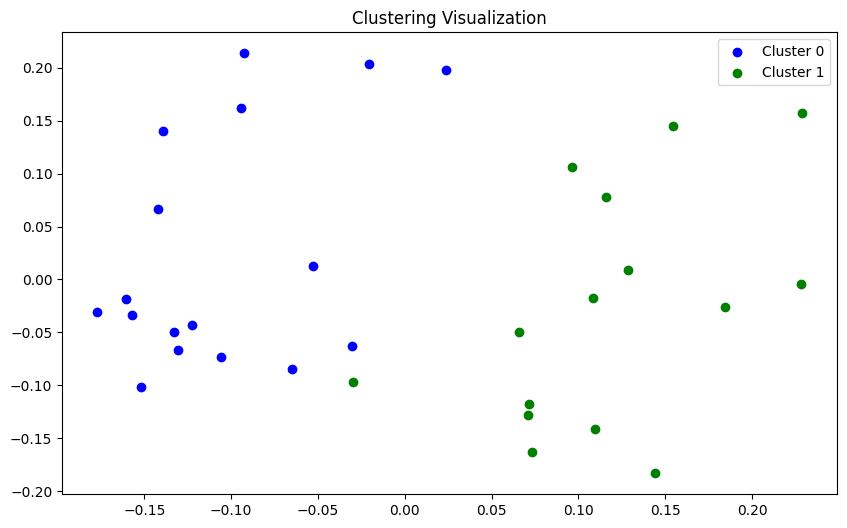

In [161]:
wiki_clustering_visual(Stephen_Hawking_df)